In [3]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
y_true = [5, 1, 4, 12, 6, 6, 12, 12, 1, 12, 9, 1, 3, 7, 9, 12, 9, 6, 6, 6, 3, 12, 10, 5, 5, 7, 7, 5, 9, 8, 10, 2, 8, 0, 2, 4, 9, 1, 2, 9, 11, 2, 11, 1, 8, 3, 8, 2, 1, 10, 6, 8, 1, 5, 3, 6, 7, 5, 7, 12, 9, 11, 5, 11, 11, 10, 11, 4, 9, 3, 8, 11, 10, 11, 9, 9, 5, 10, 10, 5, 9, 10, 11, 7, 10, 2, 4, 9, 8, 10, 3, 11, 7, 9, 0, 10, 8, 12, 6, 10, 8, 4, 12, 9, 6, 3, 6, 10, 4, 3, 11, 8, 3, 7, 8, 12, 1, 8, 8, 7, 0, 9, 2, 7, 5, 0, 9, 11, 10, 4, 7, 5, 2, 11, 7, 6, 3, 1, 4, 0, 11, 1, 4, 7, 9, 6, 1, 8, 3, 5, 11, 6, 9, 10, 6, 6, 0, 10, 4, 7, 1, 8, 11, 3, 12, 0, 11, 9, 7, 8, 7, 1, 0, 4, 1, 0, 11, 10, 6, 8, 7, 3, 12, 12, 1, 6, 5, 7, 4, 5, 12, 10, 5, 0, 1, 12, 11, 12, 2, 10, 6, 4, 10, 9, 12, 0, 3, 2, 11, 6, 7, 5, 7, 10, 0, 4, 7, 1, 6, 9, 4, 10, 10, 2, 1, 0, 0, 12, 3, 8, 4, 1, 10, 5, 12, 7, 7, 8, 10, 1, 1, 5, 0, 12, 8, 8, 8, 9, 6, 8, 9, 5, 5, 8, 7, 9, 1, 3, 5, 6, 5, 6, 5, 7, 5, 9, 0, 9, 6, 8, 10, 9, 11, 3, 4, 9, 6, 9, 5, 12, 7, 3, 4, 2, 2, 10, 9, 7, 3, 0, 1, 7, 10, 9, 1, 3, 12, 12, 6, 0, 5, 2, 8, 1, 1, 0, 4, 11, 10, 0, 0, 3, 8, 6, 6, 6, 6, 7, 12, 4, 10, 8, 5, 0, 7, 2, 9, 3, 4, 11, 3, 9, 2, 8, 4, 0, 10, 10, 7, 9, 1, 2, 9, 12, 5, 0, 6, 8, 5, 2, 1, 5, 5, 12, 8, 5, 7, 10, 3, 3, 1, 5, 1, 8, 0, 4, 2, 0, 12, 11, 11, 6, 2, 10, 8, 1, 10, 9, 1, 6, 12, 5, 10, 12, 8, 0, 11, 3, 8, 4, 12, 11, 8, 1, 3, 4, 10, 5, 0, 4, 0, 6, 12, 1, 7, 3, 4, 3, 1, 7, 0, 2, 0, 5, 10, 8, 4, 11, 5, 2, 12, 4, 8, 1, 3, 9, 9, 7, 0, 7, 7, 4, 5, 11, 12, 3, 9, 4, 4, 11, 1, 1, 1, 12, 7, 2, 2, 6, 4, 10, 9, 11, 3, 10, 3, 3, 2, 8, 3, 11, 3, 12, 6, 0, 11, 11, 11, 7, 2, 4, 4, 2, 11, 3, 6, 2, 0, 5, 3, 6, 4, 3, 7, 2, 3, 0, 2, 2, 6, 2, 2, 11, 2, 12, 12, 0, 2, 12, 0, 12, 11, 0, 0, 2, 5, 2, 12, 4, 6, 11, 2, 1, 4, 0, 11, 2, 4, 8, 2, 4]

In [6]:
y_pred = [5, 1, 4, 12, 6, 6, 12, 12, 1, 12, 9, 1, 3, 7, 9, 12, 9, 6, 6, 6, 3, 12, 10, 9, 5, 7, 7, 5, 9, 8, 10, 2, 8, 0, 2, 4, 9, 1, 2, 9, 11, 2, 11, 1, 8, 3, 8, 2, 1, 12, 6, 8, 1, 5, 3, 6, 7, 5, 7, 12, 9, 11, 5, 11, 11, 10, 11, 4, 9, 3, 8, 11, 10, 11, 9, 9, 5, 7, 10, 5, 9, 10, 11, 7, 1, 2, 4, 9, 8, 10, 3, 11, 7, 9, 0, 10, 8, 12, 7, 10, 8, 4, 12, 9, 0, 3, 6, 10, 4, 3, 11, 8, 3, 7, 8, 12, 1, 8, 8, 7, 0, 9, 2, 7, 5, 0, 9, 11, 10, 4, 7, 5, 2, 11, 7, 8, 3, 1, 4, 0, 0, 1, 4, 7, 9, 6, 1, 8, 3, 5, 11, 6, 9, 10, 6, 6, 9, 10, 4, 7, 1, 6, 11, 3, 12, 0, 11, 9, 1, 8, 7, 1, 0, 4, 1, 0, 11, 10, 6, 8, 12, 3, 7, 12, 1, 6, 5, 7, 4, 5, 12, 10, 5, 0, 1, 12, 11, 12, 2, 10, 6, 10, 10, 9, 12, 0, 3, 0, 11, 6, 7, 5, 7, 10, 0, 4, 7, 1, 6, 9, 4, 10, 10, 2, 1, 0, 0, 12, 3, 8, 4, 1, 1, 5, 12, 7, 7, 8, 10, 1, 1, 5, 0, 12, 8, 8, 6, 9, 6, 6, 9, 5, 5, 8, 7, 9, 1, 3, 5, 6, 5, 6, 5, 1, 5, 9, 0, 9, 3, 8, 10, 9, 11, 3, 4, 9, 6, 0, 5, 12, 7, 3, 4, 2, 2, 10, 9, 12, 3, 0, 1, 7, 10, 9, 1, 3, 12, 12, 6, 0, 5, 2, 6, 1, 1, 0, 4, 11, 10, 0, 0, 3, 8, 7, 7, 6, 6, 7, 12, 4, 10, 8, 5, 0, 7, 2, 9, 3, 4, 11, 3, 9, 2, 8, 4, 0, 10, 10, 7, 9, 7, 9, 9, 12, 5, 0, 6, 8, 5, 2, 7, 5, 5, 12, 8, 5, 7, 10, 3, 3, 1, 5, 7, 8, 0, 4, 2, 0, 12, 11, 11, 6, 2, 10, 8, 1, 10, 9, 1, 6, 12, 5, 10, 12, 6, 0, 11, 3, 8, 4, 12, 11, 8, 1, 3, 4, 10, 5, 0, 4, 7, 7, 12, 1, 1, 3, 4, 3, 1, 7, 0, 2, 0, 5, 10, 6, 4, 11, 5, 2, 12, 4, 8, 1, 3, 9, 9, 7, 0, 7, 7, 4, 5, 11, 12, 0, 9, 4, 4, 11, 1, 1, 7, 12, 7, 2, 2, 7, 4, 10, 9, 11, 3, 10, 3, 3, 2, 3, 3, 0, 3, 12, 9, 0, 11, 11, 11, 7, 2, 4, 4, 2, 11, 3, 6, 2, 0, 5, 3, 6, 4, 3, 12, 2, 3, 0, 6, 2, 0, 2, 9, 11, 2, 12, 12, 0, 2, 12, 0, 12, 4, 0, 4, 2, 5, 2, 12, 4, 5, 11, 2, 7, 4, 0, 11, 2, 4, 8, 2, 4]

In [7]:
confusion_matrix(y_true, y_pred)

array([[37,  0,  0,  0,  1,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0],
       [ 1,  0, 36,  0,  0,  0,  1,  0,  0,  2,  0,  0,  0],
       [ 1,  0,  0, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1,  0,  0,  0],
       [ 2,  0,  0,  1,  0,  1, 29,  5,  1,  1,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0, 34,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  1,  0,  0,  6,  0, 33,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  1,  0,  0, 36,  0,  1],
       [ 2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0, 39]])

In [8]:
cm = confusion_matrix(y_true, y_pred)

In [9]:
fileTypes = [ 'pdf', 'html', 'bmp', 'jpg', 'rtf', 'png', 'doc', 'txt', 'xls', 'gif', 'xml', 'ps', 'csv']

In [11]:
df_cm = pd.DataFrame(cm, index = [i for i in fileTypes],
                  columns = [i for i in fileTypes])

<AxesSubplot:>

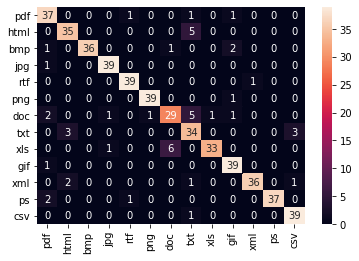

In [12]:
sn.heatmap(df_cm, annot=True)